# Problema

Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.

¿Qué perfil tienen los clientes con mayor potencial de conversión?

# El set de datos después de la limpieza

La información recolectada por la empresa de mercadeo se encuentra en un archivo CSV (`dataset_banco_clean.csv`) con 45189 filas y 17 columnas.

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

In [1]:
# imports
import pandas as pd
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
ruta = "/content/dataset_banco_clean.csv"
data = pd.read_csv(ruta)

In [3]:
print(data.shape)
data.head()

(45189, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


# Análisis exploratorio

La idea es usar herramientas estadísticas y de visualización para:

- Crear un mapa mental del set de datos (entenderlo)
- Empezar a encontrar respuestas a la pregunta planteada inicialmente (¿qué perfil tienen los clientes con mayor potencial de conversión?)

Llevaremos a cabo estas fases:

1. Análisis de cada variable de manera individual
2. Análisis univariado: relación de cada variable predictora con la variable a predecir
3. Análisis bivariado: relación de pares de variables predictoras con la variable a predecir

Para cada una de ellas generar un pequeño resumen

Podríamos borrar alguna de las variables para poder hacer el análisis mas sencillo, ya que podrían llegar a ser irrelevante, pero en esta ocasión las dejaremos.
Las variables que podríamos borrar son : contact, duration, month, day, campaign, pdays y previous, marital

In [4]:
## A completar

data.describe()




,age,balance,day,duration,campaign,pdays,previous
count,45189.000000,45189.000000,45189.000000,45189.000000,45189.000000,45189.000000,45189.000000
mean,40.936445,1374.012149,15.807188,258.115006,2.763283,40.178893,0.574166
std,10.618502,3924.370039,8.322549,257.349601,3.096579,100.107295,1.907950
min,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,58.000000


Gráfico  de variables categoricas para ver la cantidad que tenemos de cada una

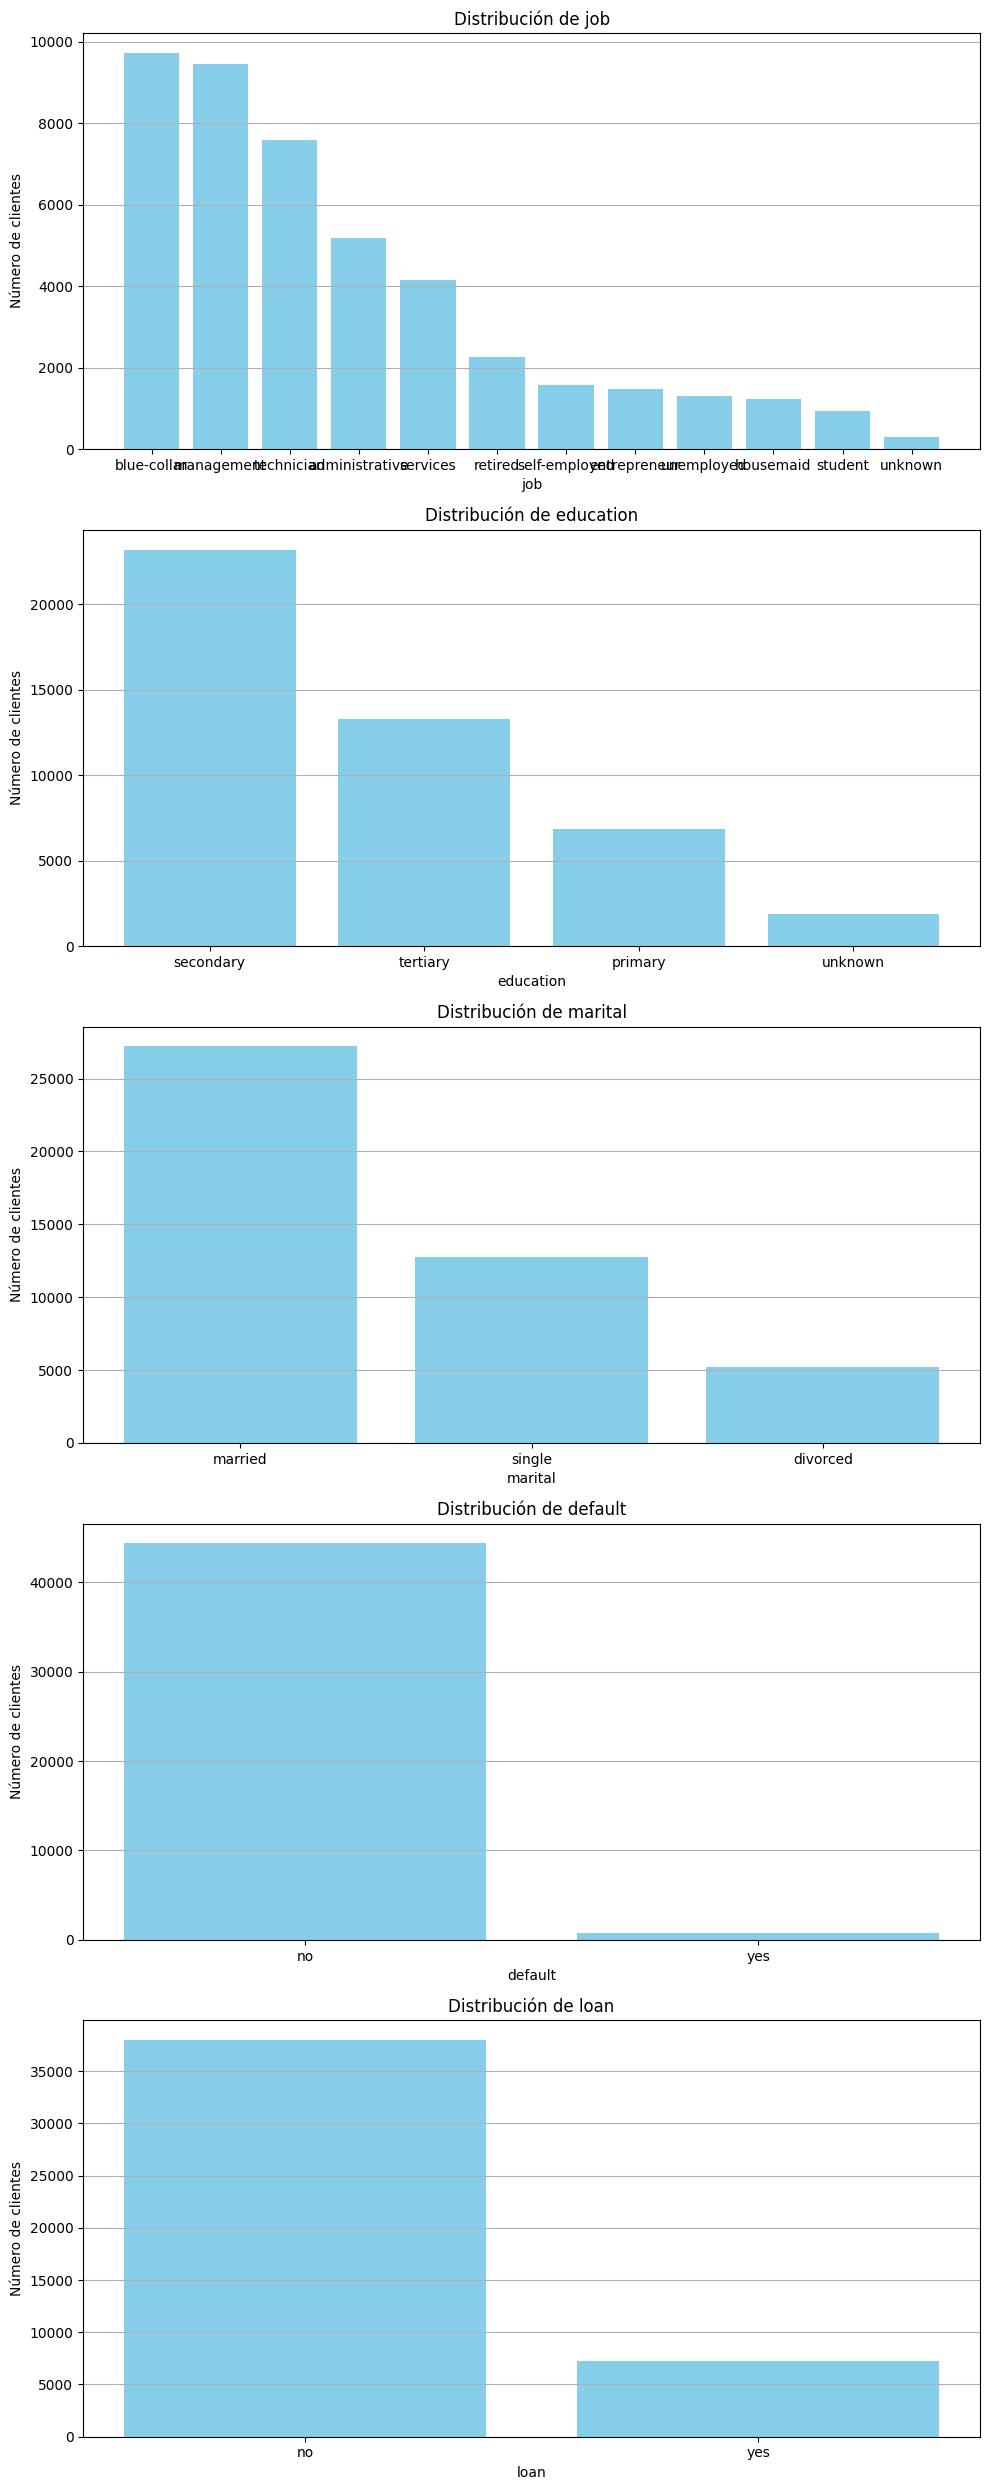

In [30]:


import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/dataset_banco_clean.csv")

# Variables categóricas que deseas graficar
categorias = ['job', 'education', 'marital','default','loan']

fig, axes = plt.subplots(len(categorias), 1, figsize=(10, len(categorias) * 5))

for i, cat in enumerate(categorias):

    counts = df[cat].value_counts()


    axes[i].bar(counts.index, counts.values, color='skyblue')
    axes[i].set_title(f"Distribución de {cat}")
    axes[i].set_xlabel(cat)
    axes[i].set_ylabel("Número de clientes")
    axes[i].grid(axis='y')

plt.tight_layout()
plt.show()





Crea un boxplot para la variable age para ver en que rango están los datos y ver si tenemos outliers

Axes(0.125,0.11;0.775x0.77)


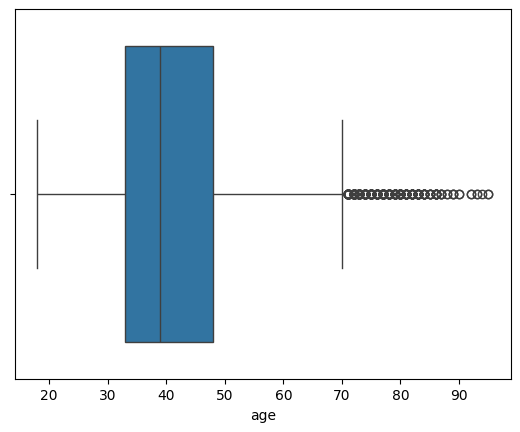

In [5]:

import pandas as pd
import seaborn as sns

df = pd.read_csv("/content/dataset_banco_clean.csv")

box_age = sns.boxplot(data=df, x="age")
print(box_age)


Crea un boxplot para la variable duration para conocer su distribución y outliers

Axes(0.125,0.11;0.775x0.77)


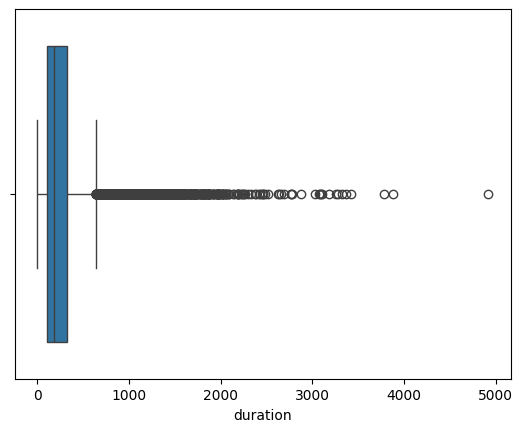

In [6]:

import pandas as pd
import seaborn as sns

df = pd.read_csv("/content/dataset_banco_clean.csv")

box_duration = sns.boxplot(data=df, x="duration")
print(box_duration)

Crea un boxplot para la variable balance para conocer su distribución y outliers

Axes(0.125,0.11;0.775x0.77)


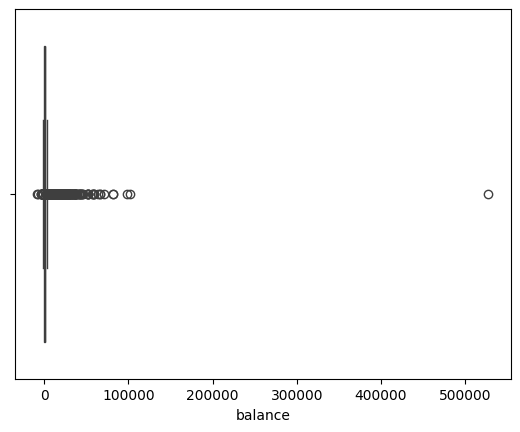

In [7]:
import pandas as pd
import seaborn as sns


df = pd.read_csv("/content/dataset_banco_clean.csv")


box_balance = sns.boxplot(data=df, x="balance")
print(box_balance)

Gráfico para saber el balance que tienen por age

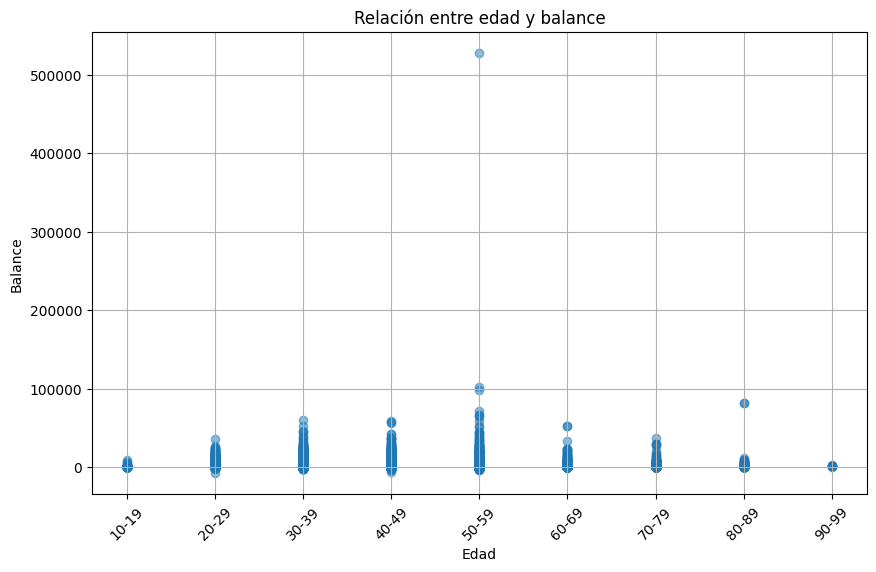

In [40]:

import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("/content/dataset_banco_clean.csv")

# Ponemos la variable age en intervalos de 10 años
bins = range(0, 101, 10)
labels = [f"{i}-{i+9}" for i in bins[:-1]]  # Genera etiquetas como "0-9", "10-19", etc.
df["age"] = pd.cut(df["age"], bins=bins, labels=labels)

# Eliminamos filas con valores NaN
df = df.dropna()

# Ordenamos los datos
df = df.sort_values(by="age", ascending=True)


plt.figure(figsize=(10, 6))
plt.scatter(df["age"], df["balance"], alpha=0.5)
plt.title("Relación entre edad y balance")
plt.xlabel("Edad")
plt.ylabel("Balance")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()




Vemos a que se dedican los clientes que si que convierten

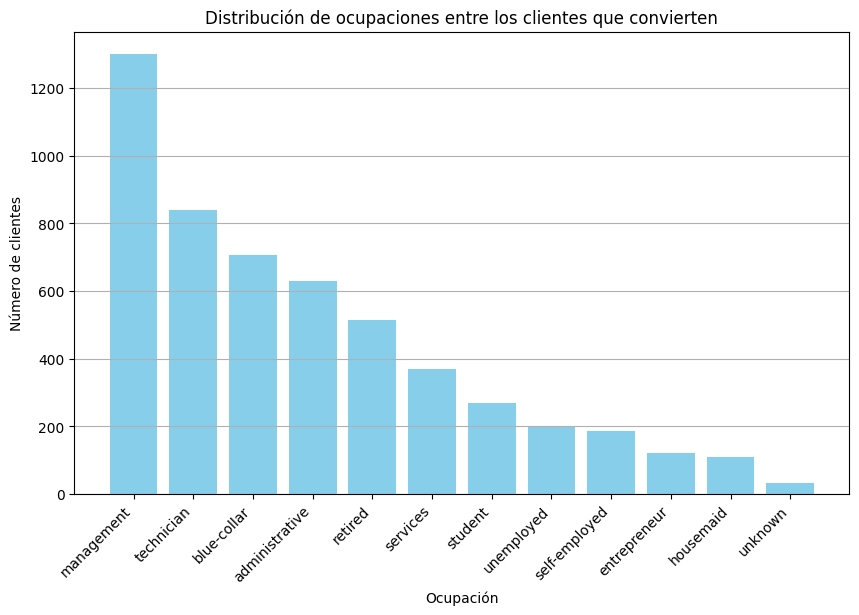

In [35]:


import pandas as pd
import matplotlib.pyplot as plt

# Carga el dataset
df = pd.read_csv("/content/dataset_banco_clean.csv")

# Filtrar los clientes que convierten
df_converters = df[df["y"] == 'yes']

# Calcular el conteo de cada ocupación
occupation_counts = df_converters["job"].value_counts()

# Graficar
plt.figure(figsize=(10, 6))
plt.bar(occupation_counts.index, occupation_counts.values, color='skyblue')
plt.title("Distribución de ocupaciones entre los clientes que convierten")
plt.xlabel("Ocupación")
plt.ylabel("Número de clientes")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


Gráfico para ver el balance tienen los clientes que si que convierten dividido en rangos

<ipython-input-37-8f7da5ef9285>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_converters["balance_range"] = pd.cut(df_converters["balance"], bins=bins, labels=labels, right=False)


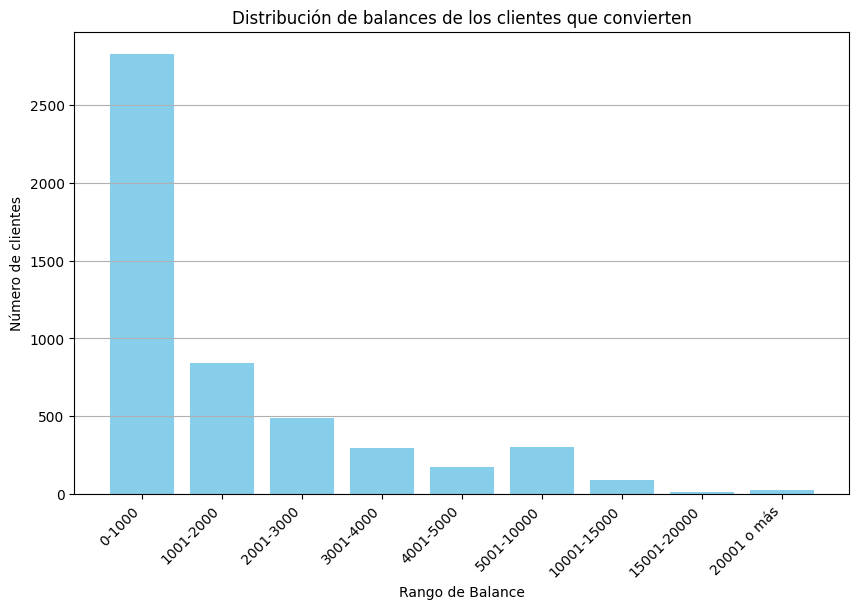

In [37]:

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/dataset_banco_clean.csv")

# Ver los clientes que si que convierten
df_converters = df[df["y"] == 'yes']

# Definir los rangos para el balance
bins = [0, 1000, 2000, 3000, 4000, 5000, 10000, 15000, 20000, float("inf")]
labels = ["0-1000", "1001-2000", "2001-3000", "3001-4000", "4001-5000", "5001-10000", "10001-15000", "15001-20000", "20001 o más"]

# Agregar una columna para el rango de balance
df_converters["balance_range"] = pd.cut(df_converters["balance"], bins=bins, labels=labels, right=False)

# Calcular el conteo de cada rango de balance
balance_counts = df_converters["balance_range"].value_counts().sort_index()


plt.figure(figsize=(10, 6))
plt.bar(balance_counts.index, balance_counts.values, color='skyblue')
plt.title("Distribución de balances de los clientes que convierten")
plt.xlabel("Rango de Balance")
plt.ylabel("Número de clientes")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


Gráfico para ver que tipo de education tienen los que si que convierten

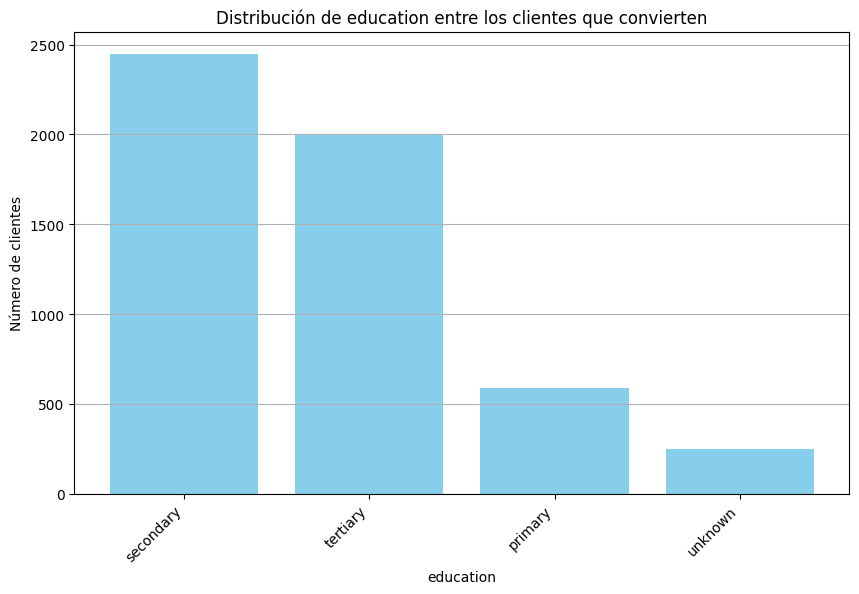

In [39]:

import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("/content/dataset_banco_clean.csv")

# Ver los clientes que si que convierten
df_converters = df[df["y"] == 'yes']

# Calcular el conteo de cada ocupación
occupation_counts = df_converters["education"].value_counts()


plt.figure(figsize=(10, 6))
plt.bar(occupation_counts.index, occupation_counts.values, color='skyblue')
plt.title("Distribución de education entre los clientes que convierten")
plt.xlabel("education")
plt.ylabel("Número de clientes")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

Análisis para saber si tener una casa en propiedad hace tener mejor conversión

In [38]:


import pandas as pd
from scipy import stats


df = pd.read_csv("/content/dataset_banco_clean.csv")

# Filtrar los clientes con y 'yes' (conversión) y 'no' (sin conversión)
df_yes = df[df['y'] == 'yes']
df_no = df[df['y'] == 'no']

# Calcular las medias de la variable objetivo ('y') para los dos grupos
mean_yes = df_yes['balance'].mean()
mean_no = df_no['balance'].mean()

# Realizamos prueba t Student
t_statistic, p_value = stats.ttest_ind(df_yes['balance'], df_no['balance'], equal_var=False)


print("Media del balance para clientes con conversión (y='yes'): {:.2f}".format(mean_yes))
print("Media del balance para clientes sin conversión (y='no'): {:.2f}".format(mean_no))
print("Valor p del test t de Student: {:.4f}".format(p_value))

alpha = 0.05
if p_value < alpha:
    print("El valor p es menor que el nivel de significancia ({}), por lo que rechazamos la hipótesis nula.".format(alpha))
    print("Tener un préstamo ('loan' = 'yes') es indicativo de una mejor conversión.")
else:
    print("El valor p es mayor que el nivel de significancia ({}), por lo que no podemos rechazar la hipótesis nula.".format(alpha))
    print("No hay suficiente evidencia para concluir que tener un préstamo ('loan' = 'yes') es indicativo de una mejor conversión.")


Media del balance para clientes con conversión (y='yes'): 1804.39
Media del balance para clientes sin conversión (y='no'): 1317.01
Valor p del test t de Student: 0.0000
El valor p es menor que el nivel de significancia (0.05), por lo que rechazamos la hipótesis nula.
Tener un préstamo ('loan' = 'yes') es indicativo de una mejor conversión.


In [11]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Carga el dataset
df = pd.read_csv("/content/dataset_banco_clean.csv")

# Discretiza la variable edad en rangos y la convierte a numérica
df["age"] = pd.cut(df["age"], bins=[0, 18, 30, 45, 60, 80], labels=[1, 2, 3, 4, 5])

# Convierte la columna "age" a tipo numérico
df["age"] = pd.to_numeric(df["age"])

# Elimina filas con valores NaN
df = df.dropna()

# Crea un modelo de regresión lineal
X = df["age"]  # Variable independiente
y = df["balance"]  # Variable dependiente

# Añade una constante al modelo (el término independiente)
X = sm.add_constant(X)

# Crea el modelo OLS
model = sm.OLS(y, X)

# Ajusta el modelo
results = model.fit()

# Observa el resumen del modelo
print(results.summary())

# Si el valor p del test F es menor que el nivel de significancia (generalmente 0.05), puedes rechazar la hipótesis nula y concluir que hay una relación significativa entre la edad y la variable dependiente.


                            OLS Regression Results                            
Dep. Variable:                balance   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     212.9
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           4.16e-48
Time:                        09:19:10   Log-Likelihood:            -4.3660e+05
No. Observations:               45090   AIC:                         8.732e+05
Df Residuals:                   45088   BIC:                         8.732e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        182.5907     83.383      2.190      0.0

# Conclusiones

Durante este análisis exploratorio de datos, examinamos un conjunto de datos de clientes bancarios para comprender mejor los factores que podrían influir en la conversión de los clientes.

Primero vemos las estadísticas básicas de las variables numéricas y graficamos las categóricas para ver la cantidad que hay de cada una de ellas.

Despues empezamos con el análisis bivariante para ver mejor las relaciones entre 2 variables, como la conversión final y el balance o el trabajo o si tener una casa en propiedad ayuda a la conversión final.

Todo ello nos ayudará a llevar mejor un análisis posteriormente.